  0%|          | 0/100 [00:00<?, ?it/s]

<Task pending name='Task-6' coro=<Engine.run() running at /home/user@AD/lab/EnergyPlus-OOEP/packages/energyplus/ooep/utils/awaitables.py:68>>

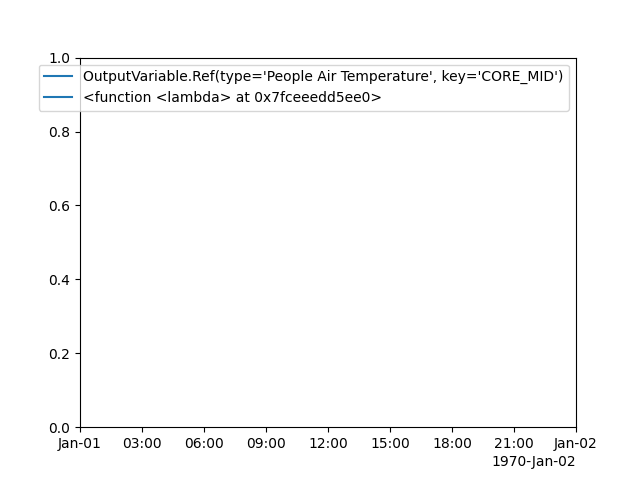

In [1]:
%matplotlib widget

from energyplus.ooep.addons.plotting import VariableTrendChart2DProvider

from energyplus.ooep.addons.progress import ProgressProvider

from energyplus.ooep import (
    Simulator,
    Model,
    Weather,
    Report,
)
from energyplus.ooep import (
    WallClock,
    OutputVariable,
)

from energyplus.dataset.basic import dataset as _epds_


simulator = Simulator().add(
    ProgressProvider(),
    #LogProvider(),
    #var_line2d := (
    #    VariableLine2DChart(event_ref='begin_zone_timestep_before_init_heat_balance')
    #    .add((
    #        WallClock.Ref(), 
    #        OutputVariable.Ref(
    #            type='People Air Temperature',
    #            key='CORE_MID',
    #        ),
    #    ), label='test', update_method='extend')
    #    .legend()
    #),
    # TODO
    var_trend := (
        VariableTrendChart2DProvider(event_ref='begin_zone_timestep_before_init_heat_balance')
            .add(
                OutputVariable.Ref(
                    type='People Air Temperature',
                    key='CORE_MID',
                )
            )
            .add(lambda: 1)
            .legend()
    ),
)

await simulator.awaitable.run(
    input=Simulator.InputSpecs(
        model=Model().open(
            _epds_.models / 'ASHRAE901_OfficeLarge_STD2019_Denver_Chiller205_Detailed.idf'
        ),
        weather=Weather().open(_epds_.weathers / 'USA_FL_Tampa.Intl.AP.722110_TMY3.epw'),
    ),
    output=Simulator.OutputSpecs(
        report=Report().open('.ooep-report-9e1287d2-8e75-4cf5-bbc5-f76580b56a69'),
    ),
    options=Simulator.RuntimeOptions(
        #design_day=True,
    ),
)



In [2]:
#var_trend.figure.autofmt_xdate()